In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import country_converter as coco
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
 
df = pd.read_csv('data/2024 QS World University Rankings.csv')
df.head()

2024 RANK      2023 RANK                              Institution Name  \
0  rank display  rank display2                                   institution   
1             1              1  Massachusetts Institute of Technology (MIT)    
2             2              2                       University of Cambridge   
3             3              4                          University of Oxford   
4             4              5                            Harvard University   

    Country Code         Country  SIZE  FOCUS      RES.       AGE  STATUS  \
0  location code        location  size  focus  research  age band  status   
1             US   United States     M     CO        VH         5       B   
2             UK  United Kingdom     L     FC        VH         5       A   
3             UK  United Kingdom     L     FC        VH         5       A   
4             US   United States     L     FC        VH         5       B   

   ... International Faculty Rank International Students Score  \
0  ...                   ifr rank                    isr score   
1  ...                         56                         88.2   
2  ...                         64                         95.8   
3  ...                        110                         98.2   
4  ...                        210                         66.8   

  International Students Rank International Research Network Score  \
0                    isr rank                            irn score   
1                         128                                 94.3   
2                          85                                 99.9   
3                          60                                100.0   
4                         223                                100.0   

  International Research Network Rank Employment Outcomes Score  \
0                            irn rank                 ger score   
1                                  58                       100   
2                                   7                       100   
3                                   1                       100   
4                                   5                       100   

  Employment Outcomes Rank Sustainability Score Sustainability Rank  \
0                 ger rank            SUS SCORE            SUS RANK   
1                        4                 95.2                  51   
2                        6                 97.3                 33=   
3                        3                 97.8                 26=   
4                        1                 96.7                  39   

   Overall SCORE  
0  Overall Score  
1          100.0  
2           99.2  
3           98.9  
4           98.3  

[5 rows x 29 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   2024 RANK                             1498 non-null   object
 1   2023 RANK                             1416 non-null   object
 2   Institution Name                      1498 non-null   object
 3   Country Code                          1498 non-null   object
 4   Country                               1498 non-null   object
 5   SIZE                                  1475 non-null   object
 6   FOCUS                                 1497 non-null   object
 7   RES.                                  1411 non-null   object
 8   AGE                                   1472 non-null   object
 9   STATUS                                1456 non-null   object
 10  Academic Reputation Score             1498 non-null   object
 11  Academic Reputation Rank      

In [3]:
categorical_cols = ['Institution Name', 'Country', 'SIZE', 'FOCUS', 'RES.']
def convert_to_int(df):
    for col in df.columns:
        if (col not in (categorical_cols)):
            df[col] = df[col].str.extract('(\d+)').astype(int)
    return df
 
def clean_data(df):
    # 删除第一行数据
    df.drop(0, axis=0, inplace=True)
    # 删除缺失值
    df = df.dropna()
    df = df.loc[df['Overall SCORE'] != '-']
    # 连接排名列、分类列和分数列
    rank_df = df[['2024 RANK', '2023 RANK']]
    cat_df = df[['Institution Name', 'Country', 'SIZE', 'FOCUS', 'RES.', 'AGE']]
    score_cols = [col for col in df.columns if 'score' in col.lower()]
    score_df = df[score_cols]
    df = pd.concat([rank_df, cat_df, score_df], axis=1)
    # 将对象类型转换为int类型 
    df = convert_to_int(df)
    # 创建等级变更列
    df['Rank Change'] = df['2023 RANK'] - df['2024 RANK']
    # 乘以-1的值RANK 2023和RANK 2024较低的排名=更好
    df['2023 RANK'] = -1 * df['2023 RANK']
    df['2024 RANK'] = -1 * df['2024 RANK']
    return df
df = clean_data(df)
df.head()

2024 RANK  2023 RANK                              Institution Name  \
1         -1         -1  Massachusetts Institute of Technology (MIT)    
2         -2         -2                       University of Cambridge   
3         -3         -4                          University of Oxford   
4         -4         -5                            Harvard University   
5         -5         -3                           Stanford University   

          Country SIZE FOCUS RES.  AGE  Academic Reputation Score  \
1   United States    M    CO   VH    5                        100   
2  United Kingdom    L    FC   VH    5                        100   
3  United Kingdom    L    FC   VH    5                        100   
4   United States    L    FC   VH    5                        100   
5   United States    L    FC   VH    5                        100   

   Employer Reputation Score  Faculty Student Score  \
1                        100                    100   
2                        100                    100   
3                        100                    100   
4                        100                     98   
5                        100                    100   

   Citations per Faculty Score  International Faculty Score  \
1                          100                          100   
2                           92                          100   
3                           90                           98   
4                          100                           84   
5                           99                           99   

   International Students Score  International Research Network Score  \
1                            88                                    94   
2                            95                                    99   
3                            98                                   100   
4                            66                                   100   
5                            51                                    95   

   Employment Outcomes Score  Sustainability Score  Overall SCORE  Rank Change  
1                        100                    95            100            0  
2                        100                    97             99            0  
3                        100                    97             98            1  
4                        100                    96             98            1  
5                        100                    94             98           -2

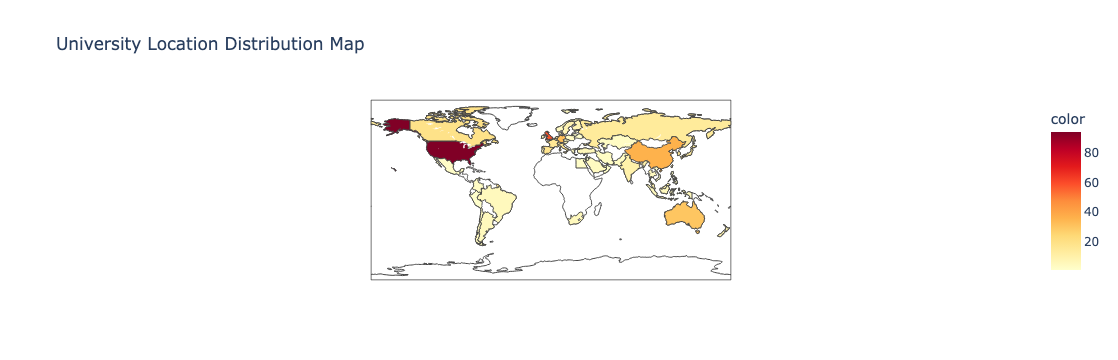

In [4]:
country_codes = coco.convert(df['Country'], to='ISO3')
country_codes = pd.Series(country_codes)
university_location = country_codes.value_counts()
fig = px.choropleth(locations=university_location.index,
                    color=university_location.values,
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    template='plotly_white',
                    title='University Location Distribution Map')
 
fig.show()

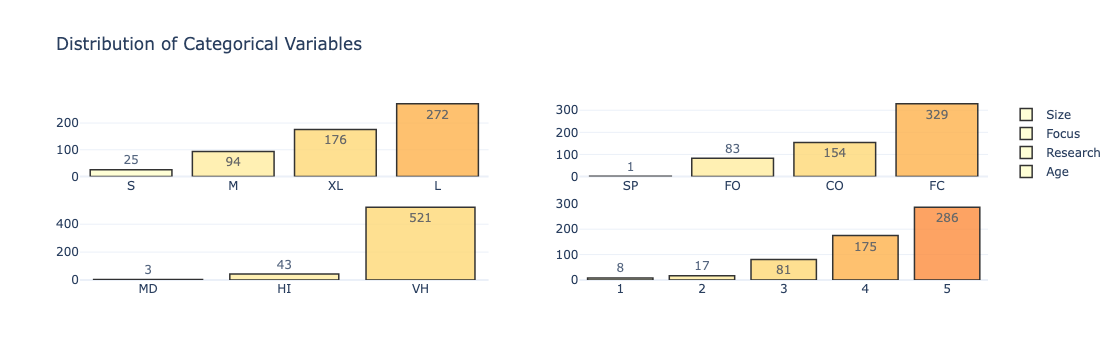

In [5]:
row_n = 2
col_n = 2 
 
fig = make_subplots(rows=row_n, cols=col_n)
size_counts = df['SIZE'].value_counts().sort_values(ascending=True)
focus_counts = df['FOCUS'].value_counts().sort_values(ascending=True)
rs_counts = df['RES.'].value_counts().sort_values(ascending=True)
age_counts = df['AGE'].value_counts().sort_values(ascending=True)
categorical_lst = [size_counts, focus_counts, rs_counts, age_counts]
categorical_labels = ['Size', 'Focus', 'Research', 'Age']
 
for i, col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=categorical_lst[i].index.astype('str'),
            y=categorical_lst[i].values, 
            name=col,
            text=np.round(categorical_lst[i].values,3),
            textposition='auto',
            marker_color=px.colors.sequential.YlOrRd,
            textfont=dict(size=12)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )
 
fig.update_layout(
    title_text='Distribution of Categorical Variables',
    template='plotly_white'
)
 
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
 
fig.show()

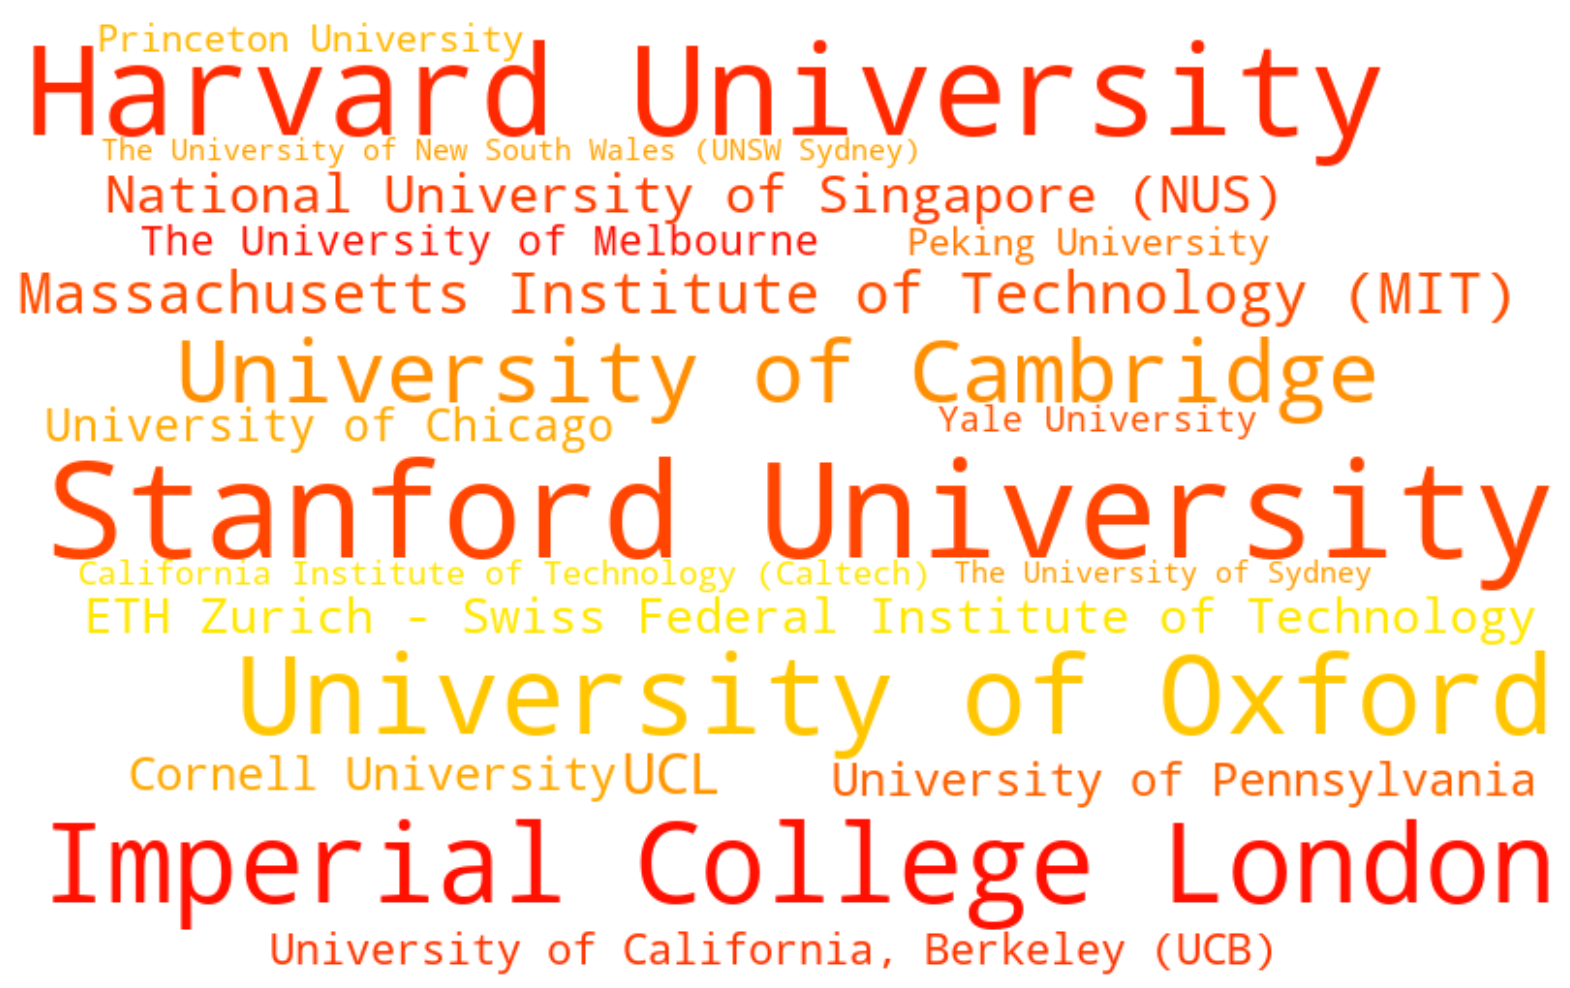

In [6]:
data = dict(zip(df['Institution Name'].tolist(), df['2024 RANK'].tolist()))
plt.figure(figsize=(20,15))
wc = WordCloud(width=800,
               height=500,
               max_words=20,
               colormap='autumn',
               background_color='white').generate_from_frequencies(data)
 
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

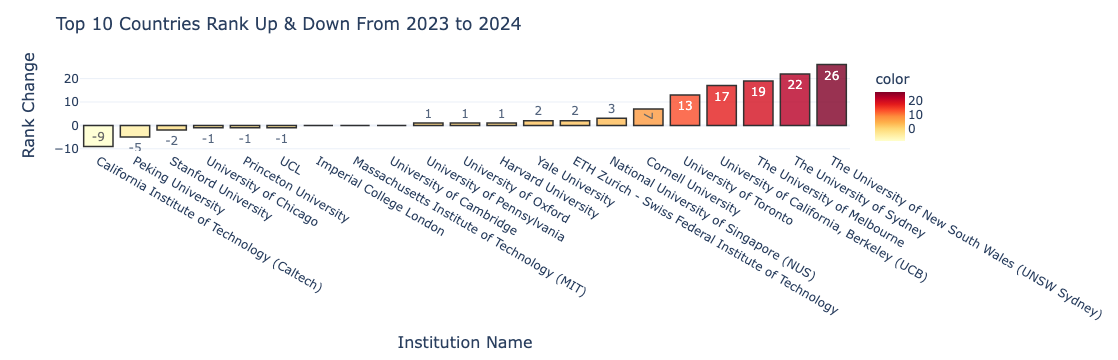

In [7]:
top20_df = df.iloc[:21]
top20_rank_change = top20_df.groupby('Institution Name')['Rank Change'].mean().sort_values(ascending=True)
fig = px.bar(x=top20_rank_change.index, y=top20_rank_change.values,
            text=np.round(top20_rank_change.values),
            color=top20_rank_change.values,
            color_continuous_scale='YlOrRd')
fig.update_layout(
    title_text='Top 10 Countries Rank Up & Down From 2023 to 2024',
    template='plotly_white',
    xaxis=dict(
        title='Institution Name',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Rank Change',
        titlefont_size=16
    ),
)
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

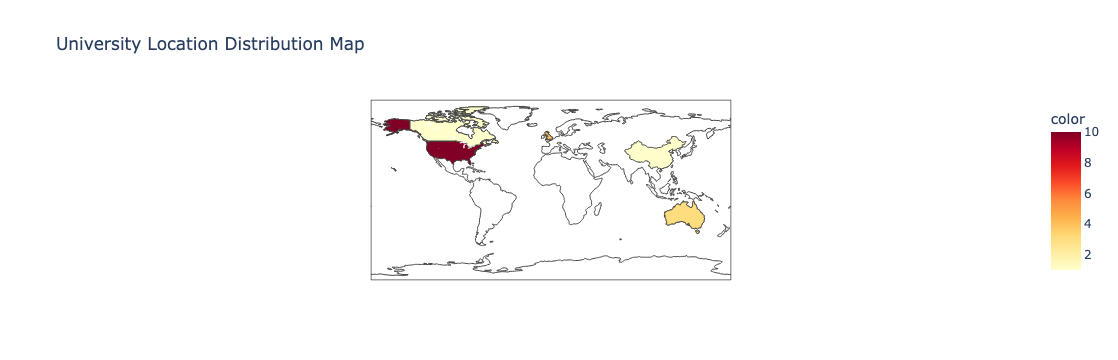

In [8]:
country_codes = coco.convert(top20_df['Country'], to='ISO3')
country_codes = pd.Series(country_codes)
university_location = country_codes.value_counts()
fig = px.choropleth(locations=university_location.index,
                    color=university_location.values,
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    template='plotly_white',
                    title='University Location Distribution Map')
 
fig.show()

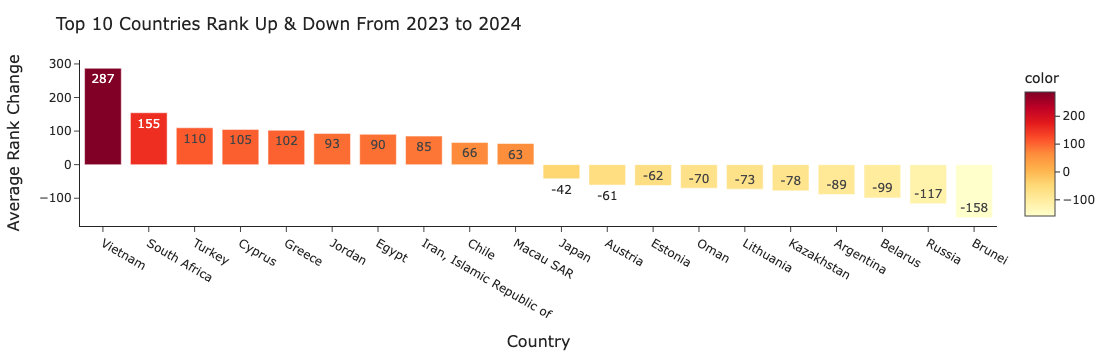

In [9]:
rank_change_down = df.groupby('Country')['Rank Change'].mean().sort_values(ascending=False)[:10]
rank_change_up = df.groupby('Country')['Rank Change'].mean().sort_values(ascending=False)[-10:]
rank_change = pd.concat([rank_change_down, rank_change_up])
fig = px.bar(x=rank_change.index, y=rank_change.values,
            text=np.round(rank_change.values),
            color=rank_change.values,
            color_continuous_scale='YlOrRd')
fig.update_layout(
    title_text='Top 10 Countries Rank Up & Down From 2023 to 2024',
    template='simple_white',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Rank Change',
        titlefont_size=16
    ),
)
 
fig.show()

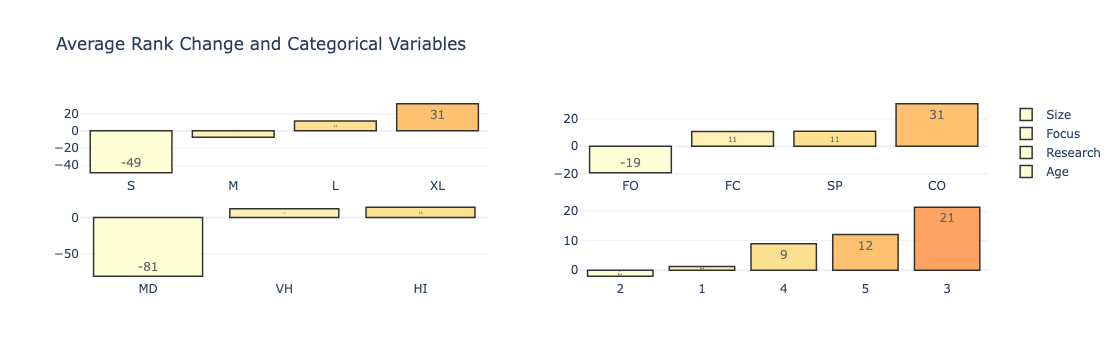

In [10]:
row_n = 2
col_n = 2 
 
fig = make_subplots(rows=row_n, cols=col_n)
change_by_size = df.groupby('SIZE')['Rank Change'].mean().sort_values(ascending=True)
change_by_focus = df.groupby('FOCUS')['Rank Change'].mean().sort_values(ascending=True)
change_by_rs = df.groupby('RES.')['Rank Change'].mean().sort_values(ascending=True)
change_by_age = df.groupby('AGE')['Rank Change'].mean().sort_values(ascending=True)
change_by_categories = [change_by_size, change_by_focus, change_by_rs, change_by_age]
categorical_labels = ['Size', 'Focus', 'Research', 'Age']
 
for i, col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=change_by_categories[i].index.astype('str'),
            y=change_by_categories[i].values, 
            name=col,
            text=np.round(change_by_categories[i].values),
            textposition='inside',
            marker_color=px.colors.sequential.YlOrRd,
            textfont=dict(size=12)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )
 
fig.update_layout(
    title_text='Average Rank Change and Categorical Variables',
    template='plotly_white'
)
 
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()

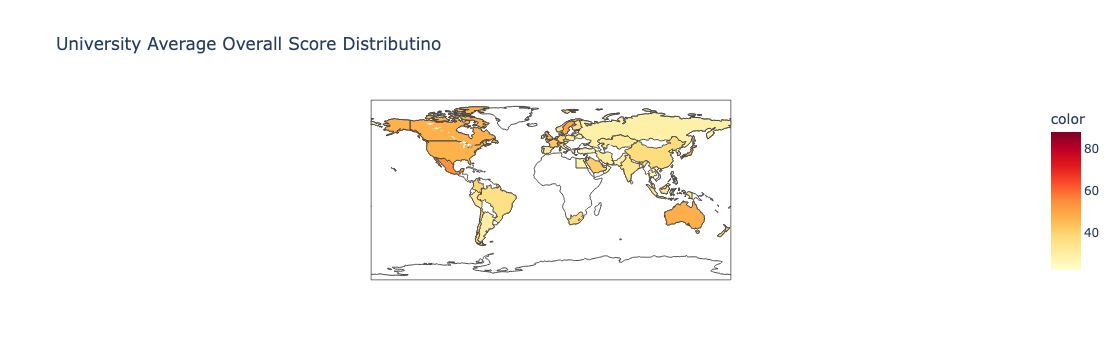

In [11]:
score_by_country = df.groupby('Country')['Overall SCORE'].mean()
score_by_country.index = coco.convert(score_by_country.index, to='ISO3')
fig = px.choropleth(locations=score_by_country.index,
                    color=score_by_country.values,
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    template='plotly_white',
                    title='University Average Overall Score Distributino')
 
fig.show()

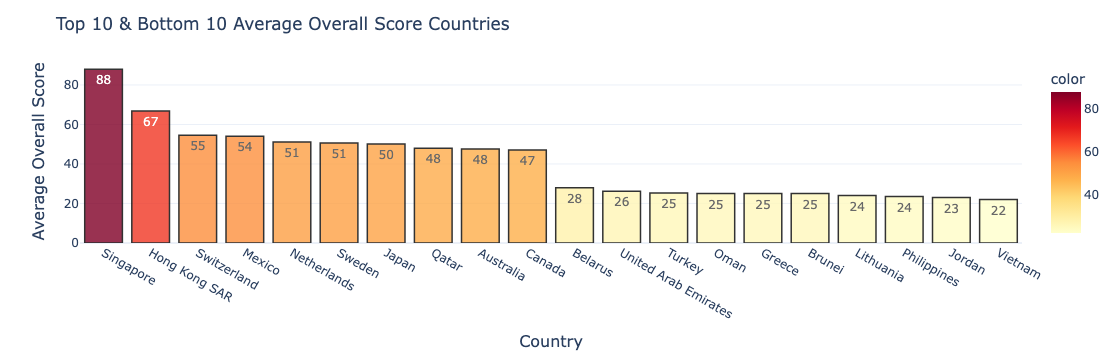

In [12]:
top10_score_country = df.groupby('Country')['Overall SCORE'].mean().sort_values(ascending=False)[:10]
low10_score_country = df.groupby('Country')['Overall SCORE'].mean().sort_values(ascending=False)[-10:]
score_country = pd.concat([top10_score_country, low10_score_country])
fig = px.bar(x=score_country.index, y=score_country.values,
            text=np.round(score_country.values),
            color=score_country.values,
            color_continuous_scale='YlOrRd')
fig.update_layout(
    title_text='Top 10 & Bottom 10 Average Overall Score Countries',
    template='plotly_white',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Overall Score',
        titlefont_size=16
    ),
)
 
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

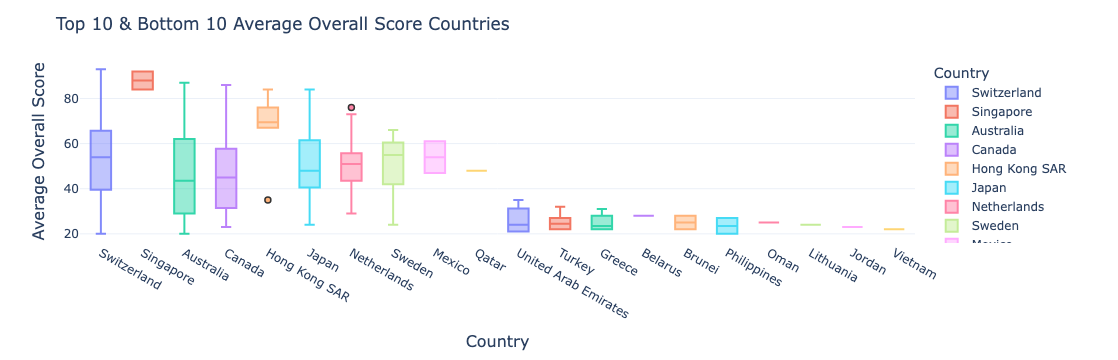

In [13]:
score_country_lst = score_country.index.tolist()
score_country_df = df.loc[df.apply(lambda x: x.Country in score_country_lst, axis=1)]
 
fig = px.box(score_country_df, 
             x='Country', 
             y='Overall SCORE', 
             color='Country',
             category_orders={'company_location': score_country_lst})
 
fig.update_layout(
    title_text='Top 10 & Bottom 10 Average Overall Score Countries',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Overall Score',
        titlefont_size=16
    ),
    template='plotly_white'
)
 
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

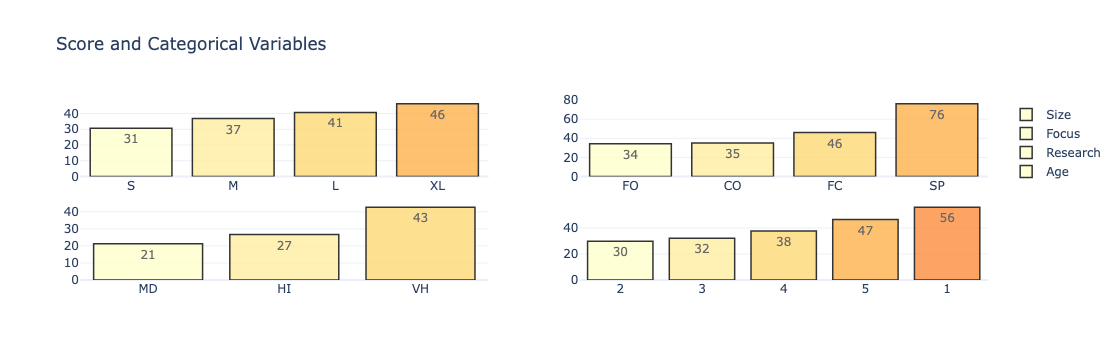

In [14]:
row_n = 2
col_n = 2 
 
fig = make_subplots(rows=row_n, cols=col_n)
score_by_size = df.groupby('SIZE')['Overall SCORE'].mean().sort_values(ascending=True)
score_by_focus = df.groupby('FOCUS')['Overall SCORE'].mean().sort_values(ascending=True)
score_by_rs = df.groupby('RES.')['Overall SCORE'].mean().sort_values(ascending=True)
score_by_age = df.groupby('AGE')['Overall SCORE'].mean().sort_values(ascending=True)
score_by_categories = [score_by_size, score_by_focus, score_by_rs, score_by_age]
categorical_labels = ['Size', 'Focus', 'Research', 'Age']
for i, col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=score_by_categories[i].index.astype('str'),
            y=score_by_categories[i].values, 
            name=col,
            text=np.round(score_by_categories[i].values),
            textposition='auto',
            marker_color=px.colors.sequential.YlOrRd,
            textfont=dict(size=12)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )
 
fig.update_layout(
    title_text='Score and Categorical Variables',
    template='plotly_white'
)
 
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()

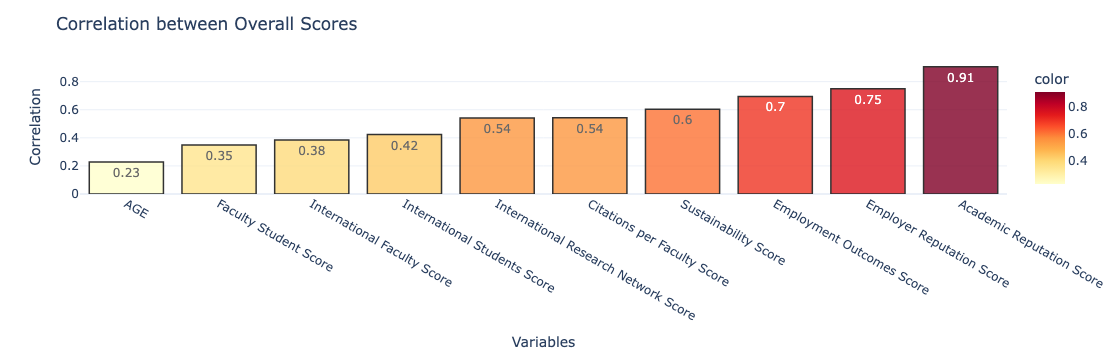

In [15]:
df_corr = df.drop(['Rank Change', '2023 RANK', '2024 RANK','Institution Name', 'Country','SIZE','FOCUS','RES.'], axis=1, inplace=False).corr()['Overall SCORE'].drop('Overall SCORE').sort_values(ascending=True)
 
fig = px.bar(df_corr, 
             x=df_corr.index, 
             y=df_corr.values,
             color=df_corr.values,
             text=np.round(df_corr.values,2),
             color_continuous_scale='YlOrRd')
 
fig.update_layout(
    title_text='Correlation between Overall Scores',
    template='plotly_white',
    xaxis=dict(
        title='Variables',
        titlefont_size=14
    ),
    yaxis=dict(
        title='Correlation',
        titlefont_size=14
    )
)
 
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()